## SHAP — Explainability for XGBoost (Data Scientist Level)

### Install and Import SHAP.

### Install and Import SHAP.

In [2]:
# !pip install shap

In [3]:
import pandas as pd
import shap

df_encoded = pd.read_pickle("churn_data_cleaned.pkl")
df_encoded.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
5,0,8,99.65,820.50,1,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
6,0,22,89.10,1949.40,0,True,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
7,0,10,29.75,301.90,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
8,0,28,104.80,3046.05,1,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
9,0,62,56.15,3487.95,0,True,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False


### Splitting the data into Training and Testing Sets.

In [6]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

### Create the SHAP Explainer (Tree-Specific)

#### Because XGBoost is tree-based, we use TreeExplainer.

In [8]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

print(classification_report(
    y_test,
    xgb.predict(X_test)
))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [9]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

### Feature Importance (SHAP Style)

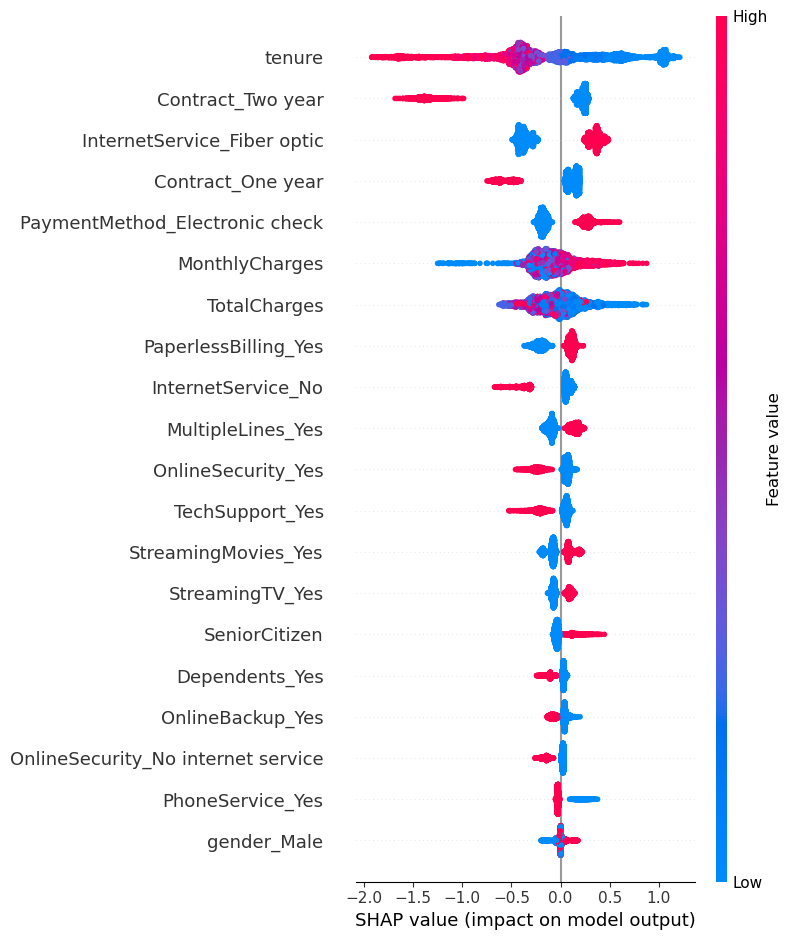

In [10]:
shap.summary_plot(shap_values, X_train)

In the summary plot:

Red = high feature value

Blue = low feature value

Left → lowers churn risk

Right → increases churn risk

#### Explanation: Tenure and MonthlyCharges have the strongest impact on churn predictions.
#### Low tenure and high charges push predictions toward churn.

### Individual Prediction - Taking a Customer at Random.

In [11]:
shap.initjs(),

i = 10
shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_train.iloc[i]
)